## Open zarr datasets

In [25]:
## import required packages
import xarray as xr
import s3fs
import zarr
import numpy as np
import netCDF4 as nc4

### Open single zarr stores for SIarea (2D) and THETA (3d)

Define access to s3 bucket

In [8]:
sassie_key = 
sassie_secret = 

In [15]:
# Initilize the S3 file system
s3 = s3fs.S3FileSystem(anon=False, key=sassie_key, secret=sassie_secret)

# AWS S3 path
s3_path = "s3://podaac-dev-sassie/ECCO_model/N1/V1/HH/ZARR/SIarea_AVG_DAILY.ZARR/"

store = s3fs.S3Map(root=s3_path, s3=s3, check=False)

Open sea ice area dataset

In [4]:
# Read Zarr file
SIarea_ds = xr.open_zarr(store=store, consolidated=True)

In [5]:
SIarea_ds

<xarray.Dataset> Size: 40GB
Dimensions:    (time: 2579, j: 1080, i: 1800, nv: 2)
Coordinates:
    XC         (j, i) float32 8MB dask.array<chunksize=(270, 450), meta=np.ndarray>
    YC         (j, i) float32 8MB dask.array<chunksize=(270, 450), meta=np.ndarray>
  * i          (i) int32 7kB 0 1 2 3 4 5 6 ... 1794 1795 1796 1797 1798 1799
  * j          (j) int32 4kB 0 1 2 3 4 5 6 ... 1074 1075 1076 1077 1078 1079
  * time       (time) datetime64[ns] 21kB 2014-01-15T12:00:00 ... 2021-02-07T...
    time_bnds  (time, nv) datetime64[ns] 41kB dask.array<chunksize=(1, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    SIarea     (time, j, i) float64 40GB dask.array<chunksize=(1, 135, 450), meta=np.ndarray>
Attributes: (12/51)
    Conventions:               CF-1.8, ACDD-1.3
    NCO:                       netCDF Operators version 5.2.1 (Homepage = htt...
    acknowledgement:           This research was carried out by the Jet Propu...
    author:                    Mike Wood, Marie Zahn, and Ian Fenty
    cdm_data_type:             Grid
    comment:                   SASSIE llc1080 V1R1 fields are consolidated on...
    ...                        ...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   This dataset provides data variable and geomet...
    time_coverage_end:         2021-02-07T00:00:00
    time_coverage_start:       2021-02-08T00:00:00
    title:                     SASSIE Ocean Model SIarea Parameter for the La...
    uuid:                      c8598c94-ea37-11ee-9f0e-06f6cde23aa5

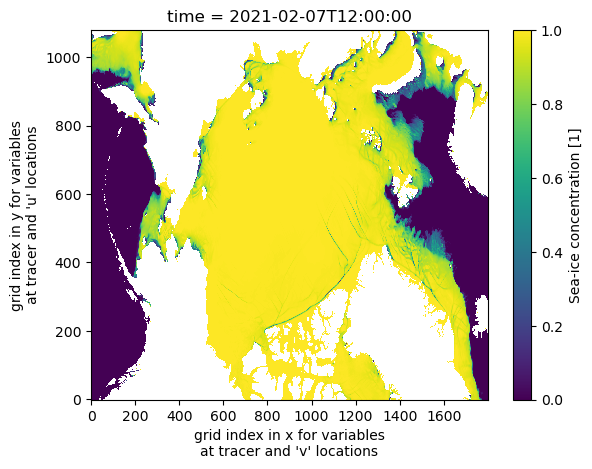

In [7]:
SIarea_ds.isel(time=-1).SIarea.plot()

In [17]:
SIarea_ds.SIarea.encoding

{'chunks': (1, 135, 450),
 'preferred_chunks': {'time': 1, 'j': 135, 'i': 450},
 'compressor': Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0),
 'filters': None,
 '_FillValue': 9.969209968386869e+36,
 'dtype': dtype('float64'),
 'coordinates': 'XC YC'}

Define path for THETA and open

In [12]:
# Initilize the S3 file system
s3 = s3fs.S3FileSystem(anon=False, key=sassie_key, secret=sassie_secret)

# AWS S3 path
s3_path = "s3://podaac-dev-sassie/ECCO_model/N1/V1/HH/ZARR/THETA_AVG_DAILY.ZARR/"

store = s3fs.S3Map(root=s3_path, s3=s3, check=False)

In [13]:
# Read Zarr store
theta_ds = xr.open_zarr(store=store, consolidated=True)

In [18]:
theta_ds.THETA.encoding

{'chunks': (1, 12, 135, 225),
 'preferred_chunks': {'time': 1, 'k': 12, 'j': 135, 'i': 225},
 'compressor': Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0),
 'filters': None,
 '_FillValue': 9.969209968386869e+36,
 'dtype': dtype('float64'),
 'coordinates': 'XC YC Z'}

In [19]:
theta_ds.XC.encoding

{'chunks': (270, 450),
 'preferred_chunks': {'j': 270, 'i': 450},
 'compressor': Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0),
 'filters': None,
 '_FillValue': nan,
 'dtype': dtype('float32')}

In [20]:
theta_ds.YC.encoding

{'chunks': (270, 450),
 'preferred_chunks': {'j': 270, 'i': 450},
 'compressor': Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0),
 'filters': None,
 '_FillValue': nan,
 'dtype': dtype('float32')}